# My DCT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.fftpack as fft
from joblib import Parallel, delayed
from time import time
import csv

### Methods Definition

In [2]:
def dct2(A):
    return fft.dct(fft.dct(A, axis=0, norm='ortho'), axis=1, norm='ortho')

In [3]:
def my_dct(v):
    N = len(v)
    a = [0] * N
    for k in range(0, N):
        for i in range(0, N):
            a[k] += np.cos(np.pi * k * ((2 * i + 1) / (2 * N))) * v[i]
        den = N / 2
        if(k == 0): den = N
        a[k] = (a[k] / np.sqrt(den))
    return a

def my_dct2(A):
    N = len(A)
    m = np.zeros((N, N))
    for i in range(0, N):
        m[i] = my_dct(A[i])
    for j in range(0, N):
        m[:, j] = my_dct(m[:, j])
    return m

In [4]:
def process(mat):
    print("... Computing DCT2 - Matrix size: ", len(mat))
    start = time()
    dct2(mat)
    end = time()
    time_dct2 = end - start
    start = time()
    my_dct2(mat)
    end = time()
    time_my_dct2 = end - start
    print("DONE Computed DCT2 - Matrix size: ", len(mat))
    return [len(mat), time_dct2, time_my_dct2]

In [5]:
def new_matrix(N):
    print("... Generating matrix - Matrix size: ", N)
    return np.random.randint(0, 255, size=(N, N))

In [6]:
def wrapper(mat, seq):
    with open('times' + seq + '.csv', 'a') as fileObj:
        writerObj = csv.writer(fileObj)
        writerObj.writerow(process(mat))

In [7]:
def generate_matrices(start, end, every, exp=False):
    
    if(exp):
        # Exponential sizes
        matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in (every**p for p in range(start, end)))
    else:
        # Linear sizes
        matrices = Parallel(n_jobs=5)(delayed(new_matrix)(N) for N in range(start, end, every))
        
    print("\nDone generating matrices\n")

    return matrices

In [8]:
def compute_times(start, end, every, exp=False):
    
    matrices = generate_matrices(start, end, every, exp)
    if(exp):
        seq = str(start) + 'to' + str(end) + 'exp' + str(every)
    else:
        seq = str(start) + 'to' + str(end) + 'step' + str(every)

    with open('times' + seq + '.csv', 'w') as fileObj:
            writerObj = csv.writer(fileObj)
            writerObj.writerow(['N', 'DCT2 Time', 'My DCT2 Time'])

    times = Parallel(n_jobs=7)(delayed(wrapper)(m, seq) for m in matrices)

    return times

In [9]:
def plot(df, scale='log'):
    sns.set_theme(style="darkgrid")
    plt.figure(figsize=(15, 10))
    ax = sns.lineplot(data=df, x="N", y="DCT2 Time", legend='brief', color='darkseagreen', label='DCT2')
    sns.lineplot(data=df, x="N", y="My DCT2 Time", legend='brief', color='cornflowerblue', label='My DCT2')
    ax.set_yscale(scale)

### Preliminary tests

In [10]:
test = [231, 32, 233, 161, 24, 71, 140, 245]
dct_test = fft.dct(test, norm='ortho')

print(dct_test)

[ 401.9902051     6.60001991  109.16736544 -112.78557857   65.40737726
  121.83139804  116.65648855   28.80040722]


In [11]:
mat = [[231, 32, 233, 161, 24, 71, 140, 245], 
         [247, 40, 248, 245, 124, 204, 36, 107], 
         [234, 202, 245, 167, 9, 217, 239, 173], 
         [193, 190, 100, 167, 43, 180, 8, 70], 
         [11, 24, 210, 177, 81, 243, 8, 112], 
         [97, 195, 203, 47, 125, 114, 165, 181], 
         [193, 70, 174, 167, 41, 30, 127, 245], 
         [87, 149, 57, 192, 65, 129, 178, 228]]

print(my_dct2(mat))

print(dct2(mat))

[[ 1.11875000e+03  4.40221926e+01  7.59190503e+01 -1.38572411e+02
   3.50000000e+00  1.22078055e+02  1.95043868e+02 -1.01604906e+02]
 [ 7.71900790e+01  1.14868206e+02 -2.18014421e+01  4.13641351e+01
   8.77720598e+00  9.90829620e+01  1.38171516e+02  1.09092795e+01]
 [ 4.48351537e+01 -6.27524464e+01  1.11614114e+02 -7.63789658e+01
   1.24422160e+02  9.55984194e+01 -3.98287969e+01  5.85237670e+01]
 [-6.99836647e+01 -4.02408945e+01 -2.34970508e+01 -7.67320594e+01
   2.66457750e+01 -3.68328290e+01  6.61891485e+01  1.25429731e+02]
 [-1.09000000e+02 -4.33430857e+01 -5.55436908e+01  8.17347083e+00
   3.02500000e+01 -2.86602437e+01  2.44149822e+00 -9.41437025e+01]
 [-5.38783591e+00  5.66345009e+01  1.73021519e+02 -3.54234494e+01
   3.23878249e+01  3.34576728e+01 -5.81167864e+01  1.90225615e+01]
 [ 7.88439693e+01 -6.45924096e+01  1.18671203e+02 -1.50904840e+01
  -1.37316928e+02 -3.06196663e+01 -1.05114114e+02  3.98130497e+01]
 [ 1.97882438e+01 -7.81813409e+01  9.72311860e-01 -7.23464180e+01
  -

matrices = []
for N in range(1, 50, 1):
    matrices.append(np.random.randint(0, 300, size=(N, N)))

#### Generation of exponential and linear sizes matrices

In [ ]:
start = 2
end = 2
every = 2

compute_times(start, end, every)

### Plots

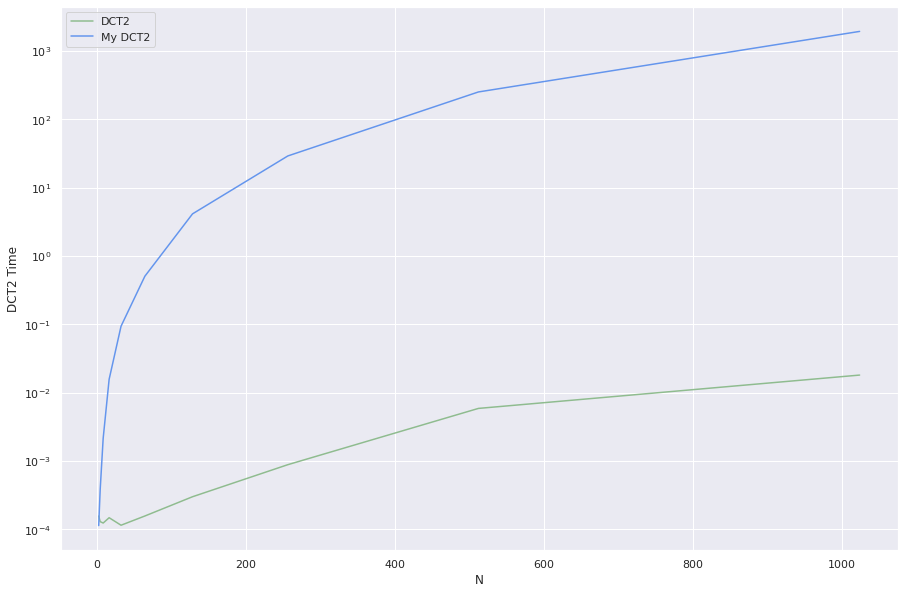

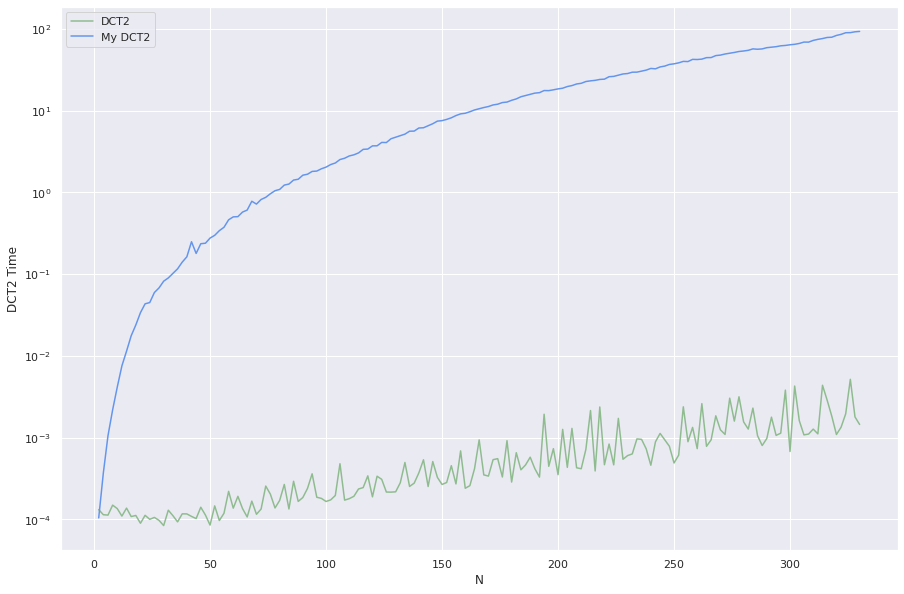

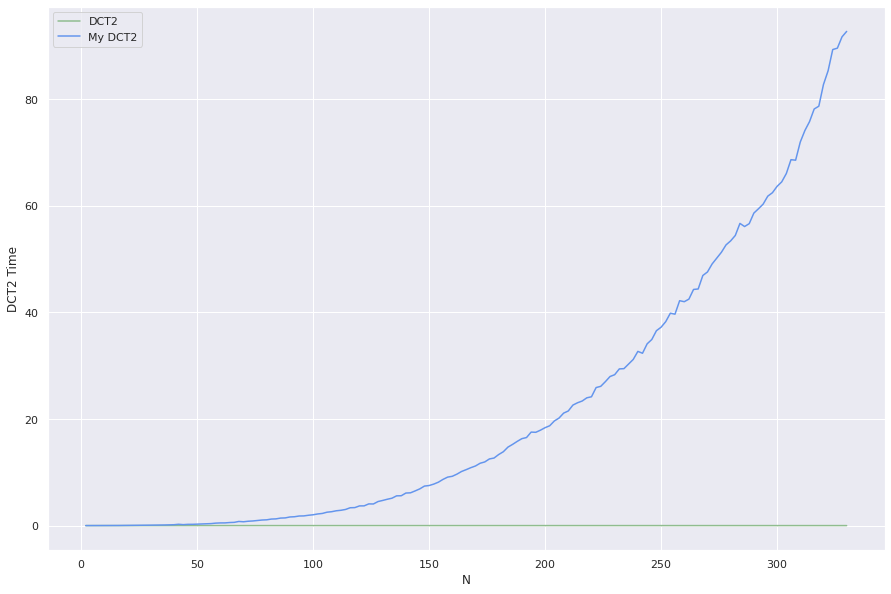

In [13]:
plot(pd.read_csv('data/times_2exp.csv'))
plot(pd.read_csv('data/times_2to330.csv'))
plot(pd.read_csv('data/times_2to330.csv'), scale='linear')